### Importing required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

### Reading and understanding data

In [3]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.describe(percentiles=[0.10,0.20,0.30,0.50,0.75,0.95,0.99])

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
10%,20.900000,24.880000,3.400000,5.990000,7.960000
20%,40.800000,59.180000,7.680000,9.380000,9.700000
30%,60.700000,86.750000,11.940000,15.970000,10.870000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
95%,190.050000,280.735000,46.810000,71.825000,23.800000


In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.shape

(200, 4)

In [8]:
df.isnull().sum()

,0
TV,0
radio,0
newspaper,0
sales,0


### Data Visualization

<ipython-input-9-448137b970ec>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)


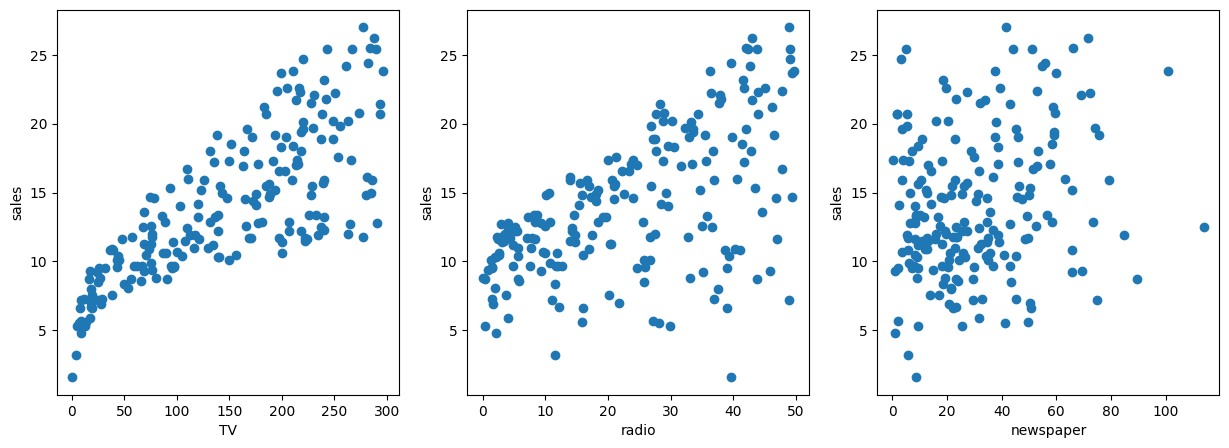

In [9]:
plt.subplots(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(df['TV'],df['sales'])
plt.xlabel('TV')
plt.ylabel('sales')

plt.subplot(1,3,2)
plt.scatter(df['radio'],df['sales'])
plt.xlabel('radio')
plt.ylabel('sales')

plt.subplot(1,3,3)
plt.scatter(df['newspaper'],df['sales'])
plt.xlabel('newspaper')
plt.ylabel('sales')

plt.show()

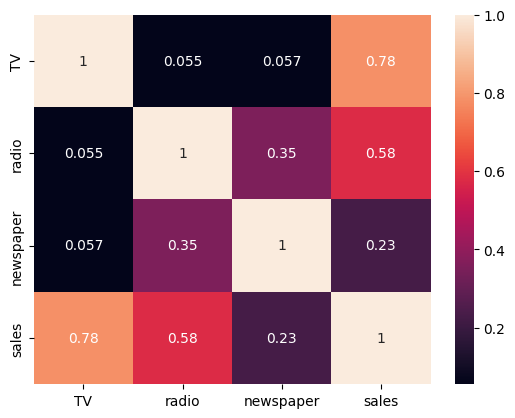

In [10]:
sns.heatmap(df.corr(),annot=True)
plt.show()

### Data Preprocessing

In [11]:
df_train, df_test = train_test_split(df,train_size = 0.7,random_state=42)
df_train.shape, df_test.shape

((140, 4), (60, 4))

In [12]:
scaler = MinMaxScaler()
df_train = scaler.fit_transform(df_train)
df_test = scaler.transform(df_test)

In [13]:
df_train = pd.DataFrame(df_train,columns=df.columns)
df_train.head()

,TV,radio,newspaper,sales
0,0.959080,0.213710,0.060636,0.527559
1,0.622929,0.423387,0.215706,0.547244
2,0.379439,0.350806,0.380716,0.405512
3,0.078120,0.707661,0.652087,0.299213
4,0.980724,0.082661,0.081511,0.440945


In [14]:
df_test = pd.DataFrame(df_test,columns=df.columns)
df_test.head()

,TV,radio,newspaper,sales
0,0.549882,0.637097,0.522863,0.602362
1,0.658438,0.961694,0.522863,0.818898
2,0.988164,0.570565,0.426441,0.779528
3,0.037200,0.743952,0.446322,0.224409
4,0.742645,0.987903,0.028827,0.909449


### Model building

In [15]:
X_train = df_train.drop('sales',axis=1)
y_train = df_train['sales']

X_test = df_test.drop('sales',axis=1)
y_test = df_test['sales']

#### Using Stats Model API

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
X_train = sm.add_constant(X_train)

In [18]:
model = sm.OLS(y_train,X_train).fit()

In [19]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     434.5
Date:                Mon, 16 Sep 2024   Prob (F-statistic):           1.88e-69
Time:                        10:38:58   Log-Likelihood:                 190.65
No. Observations:                 140   AIC:                            -373.3
Df Residuals:                     136   BIC:                            -361.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0450      0.015      3.068      0.0

#### Using SKlearn

In [24]:
X_train = df_train.drop('sales',axis=1)
y_train = df_train['sales']

X_test = df_test.drop('sales',axis=1)
y_test = df_test['sales']

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
lr.coef_

array([0.51292635, 0.38915984, 0.02725885])

In [27]:
lr.intercept_

0.04495493404932349

In [28]:
y_test_pred = lr.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8609466508230367


<ipython-input-29-83295bb06efd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


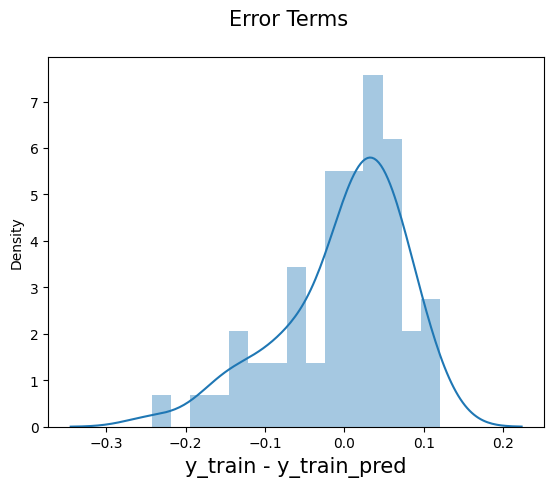

In [29]:
res = y_test - y_test_pred
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()